### CPR(COPYPASTERUN)_BID(BREAKITDOWN)_UT(UNITTEST)

In [1]:
# Goal: create a histogram of temperatures and create a best fit line for it
# and learn all about, CPR, BID, UT (Copy paste run, break it down, and unit test)

In [2]:
import datetime
import numpy as np
import xarray as xr
from ahh import vis
from scipy import interpolate

/home/solactus/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
GFS_FMT = 'http://nomads.ncep.noaa.gov:9090/dods/gfs_1p00/gfs{dt.year:04d}{dt.month:02d}{dt.day:02d}/gfs_1p00_00z'

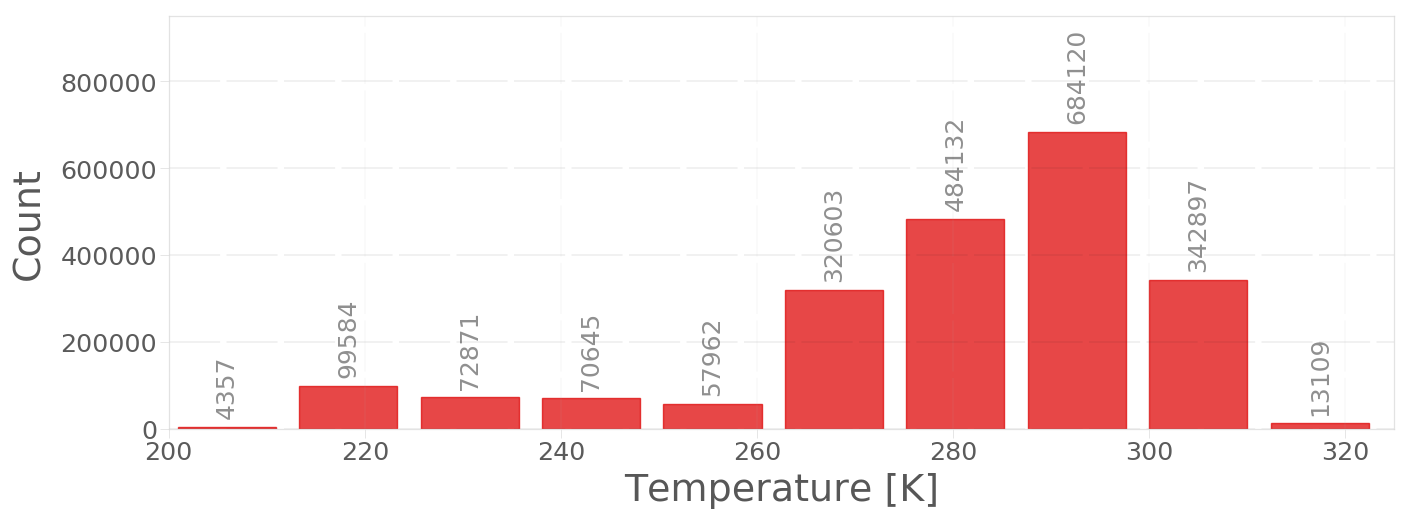

In [4]:
dt = datetime.datetime.utcnow() - datetime.timedelta(days=1) # prepare data
url = GFS_FMT.format(dt=dt) # prepare data
ds_t2m = xr.open_dataset(url)['tmp2m'] # prepare data
hist, bins = np.histogram(ds_t2m) # let's say you're already a skilled histogram creator
vis.plot_bar(bins[:-1], hist, xlim=(200, 325), ylim=(0, 950000), xlabel='Temperature [K]', ylabel='Count') # and plotter

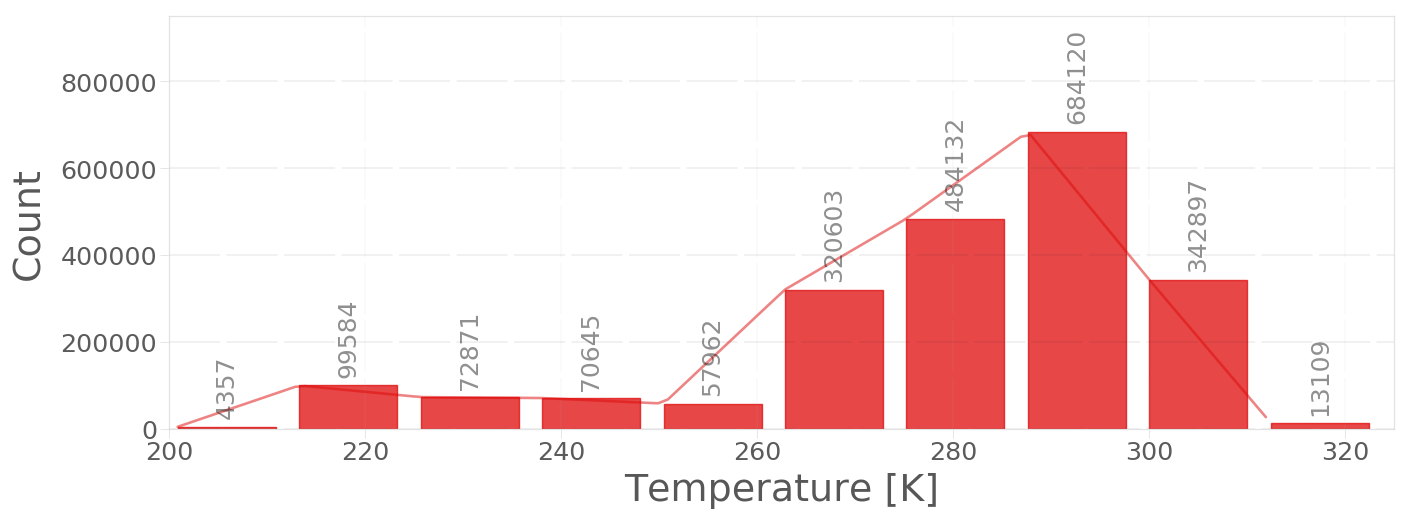

In [5]:
f = interpolate.interp1d(bins[:-1], hist) # say, you remember how to utilize a relevant function...
bins_new = np.arange(np.min(bins), np.max(bins[:-1]))
hist_interpd = f(bins_new)

vis.plot_bar(bins[:-1], hist, xlim=(200, 325), ylim=(0, 950000), xlabel='Temperature [K]', ylabel='Count')
vis.plot_line(bins_new, hist_interpd, xlim=(200, 325), ylim=(0, 950000),
              xlabel='Temperature [K]', ylabel='Count', figsize='na') # but it doesn't yield what you want, but it's okay

/home/solactus/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: RankWarning: Polyfit may be poorly conditioned


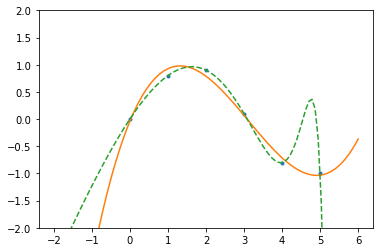

In [6]:
import matplotlib.pyplot as plt # CPR (COPY PASTE RUN)!
import numpy as np
# copy over the example online and explore the example first before trying to apply to what you're doing.

x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 3)
p = np.poly1d(z)
p30 = np.poly1d(np.polyfit(x, y, 30))
xp = np.linspace(-2, 6, 100)
_ = plt.plot(x, y, '.', xp, p(xp), '-', xp, p30(xp), '--') # _ = ... just convention to save a dummy variable
_ = plt.ylim(-2,2) # _ = ... mostly used to hide output you don't want to see

In [7]:
# BID (BREAK IT DOWN)! Part 1
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 3)
x, y, z # see what the output is
# the first three are numpy arrays

(array([ 0.,  1.,  2.,  3.,  4.,  5.]),
 array([ 0. ,  0.8,  0.9,  0.1, -0.8, -1. ]),
 array([ 0.08703704, -0.81349206,  1.69312169, -0.03968254]))

In [8]:
# BID! Part 2
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 1) # what happens if you change it to 1?
x, y, z, # see what the output is again
# we notice that the length changes, and a little documentation reveals that the 3rd input is "degree of the fitting polynomial"
# so through that understanding, we can reason that z is outputting the "m" and "b" in y = mx + b

(array([ 0.,  1.,  2.,  3.,  4.,  5.]),
 array([ 0. ,  0.8,  0.9,  0.1, -0.8, -1. ]),
 array([-0.30285714,  0.75714286]))

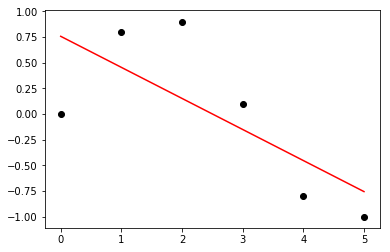

In [9]:
# BID! Part 3
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 1)
# so let's test that theory
plt.scatter(x, y, color='black')
plt.plot(x, z[0] * x + z[1], color='red') # remember z[0] is just m and z[1] is just b
# this is becoming clearer!

In [10]:
# BID! Part 4
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 1)
p = np.poly1d(z) # so what was this p in the example?
# print it out to see!
x, y, z, p
# we notice that it yields z, but instead of array(), it's poly1d... not too helpful in understanding!

(array([ 0.,  1.,  2.,  3.,  4.,  5.]),
 array([ 0. ,  0.8,  0.9,  0.1, -0.8, -1. ]),
 array([-0.30285714,  0.75714286]),
 poly1d([-0.30285714,  0.75714286]))

In [11]:
# BID! Part 5 and CPR again Part 1!
# Construct the polynomial x^2 + 2x + 3...
p = np.poly1d([1, 2, 3])
p(0.5) # what does the output mean?

4.25

In [12]:
# BID! Part 6 and CPR again Part 2!
p = np.poly1d([1, 2, 3])
p(1) # try changing it to 1, away from decimals
# and we notice that p is actually a generator; it generates a polynomial
# i.e. c1*x^2 + c2*2x + c3 where c is coefficients
# here, 1x^2 + 2x + 3 where x = 1, so 1 + 2 + 3 = 6

6

In [13]:
# BID! Part 7 and CPR again Part 3 and UT Part 1(unit test)!
# let's verify that theory by changing the values
p = np.poly1d([2, 3, 4]) 
p(1) # x = 1 here
# here, 2x^2 + 3x + 4 where x = 1, so 2 + 3 + 4 = 9

9

In [14]:
# BID! Part 8 and CPR again Part 4 and UT Part 2 (unit test)!
p = np.poly1d([1, 2, 3]) # let's change the below value
p(2) # change x = 2
# here, 1x^2 + 2x + 3 where x = 2, so 2^2 + 2*2 + 3 = 11
# great, we now understand what poly1d does

11

In [15]:
# BID! Part 9
# so let's get back to where we were and recap and apply our existing knowledge and continue further
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0]) # create example x data
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0]) # create example y data
z = np.polyfit(x, y, 1) # create coefficients, m and b
p = np.poly1d(z) # create a generator ready to apply coefficient

# this is just a combination of z and p jumbled into one line
p30 = np.poly1d(np.polyfit(x, y, 30)) # create a generator with 30 coefficients, c1, c2, c3 .. c30

# now this; if you are experienced, you can skip, but...
xp = np.linspace(-2, 6, 100)
# for beginners, print it out... although it doesn't seem too intuitive
xp

/home/solactus/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: RankWarning: Polyfit may be poorly conditioned


array([-2.        , -1.91919192, -1.83838384, -1.75757576, -1.67676768,
       -1.5959596 , -1.51515152, -1.43434343, -1.35353535, -1.27272727,
       -1.19191919, -1.11111111, -1.03030303, -0.94949495, -0.86868687,
       -0.78787879, -0.70707071, -0.62626263, -0.54545455, -0.46464646,
       -0.38383838, -0.3030303 , -0.22222222, -0.14141414, -0.06060606,
        0.02020202,  0.1010101 ,  0.18181818,  0.26262626,  0.34343434,
        0.42424242,  0.50505051,  0.58585859,  0.66666667,  0.74747475,
        0.82828283,  0.90909091,  0.98989899,  1.07070707,  1.15151515,
        1.23232323,  1.31313131,  1.39393939,  1.47474747,  1.55555556,
        1.63636364,  1.71717172,  1.7979798 ,  1.87878788,  1.95959596,
        2.04040404,  2.12121212,  2.2020202 ,  2.28282828,  2.36363636,
        2.44444444,  2.52525253,  2.60606061,  2.68686869,  2.76767677,
        2.84848485,  2.92929293,  3.01010101,  3.09090909,  3.17171717,
        3.25252525,  3.33333333,  3.41414141,  3.49494949,  3.57

In [16]:
# BID Part 10 and UT (unit test) Part 1
# since it's not intuitive, change the numbers, and print!
xp = np.linspace(0, 2, 1)
xp # well that didn't work either

array([ 0.])

In [17]:
# BID Part 10 and UT Part 2
# try again!
xp = np.linspace(0, 1, 3)
xp # ah we now can sort of see that this function's first input is start, second input is end
# and the third input is the length of array

array([ 0. ,  0.5,  1. ])

In [18]:
# BID Part 11 and UT Part 3
# test that new knowledge and see if it matches expectations!
xp = np.linspace(0, 1, 5)
xp, len(xp) # it's consistent with our expectations!

(array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ]), 5)

/home/solactus/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: RankWarning: Polyfit may be poorly conditioned


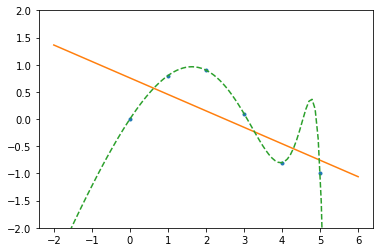

In [19]:
# BID! Part 12
# back again!
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0]) # create example x data
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0]) # create example y data
z = np.polyfit(x, y, 1) # create coefficients, m and b
p = np.poly1d(z) # create a generator ready to apply coefficient
p30 = np.poly1d(np.polyfit(x, y, 30)) # create a generator with 30 coefficients, c1, c2, c3 .. c30
xp = np.linspace(-2, 6, 100) # start at -2, end at 6, 100 values in between

# now we see a bunch of stuff in this line... so let's break it down!
_ = plt.plot(x, y, '.', xp, p(xp), '-', xp, p30(xp), '--')
_ = plt.ylim(-2, 2)

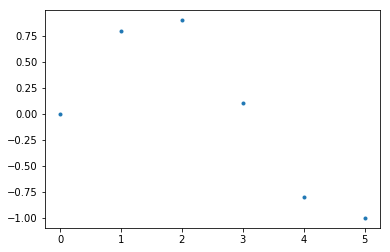

In [20]:
# BID! Part 13 UT Part 1
_ = plt.plot(x, y, '.') # we note that this just plots x and y as a scatter plot
# and we note that if we remove the second line, plt.ylim(-2, 2), the ylimits aren't set

array([-2.        , -1.91919192, -1.83838384, -1.75757576, -1.67676768,
       -1.5959596 , -1.51515152, -1.43434343, -1.35353535, -1.27272727,
       -1.19191919, -1.11111111, -1.03030303, -0.94949495, -0.86868687,
       -0.78787879, -0.70707071, -0.62626263, -0.54545455, -0.46464646,
       -0.38383838, -0.3030303 , -0.22222222, -0.14141414, -0.06060606,
        0.02020202,  0.1010101 ,  0.18181818,  0.26262626,  0.34343434,
        0.42424242,  0.50505051,  0.58585859,  0.66666667,  0.74747475,
        0.82828283,  0.90909091,  0.98989899,  1.07070707,  1.15151515,
        1.23232323,  1.31313131,  1.39393939,  1.47474747,  1.55555556,
        1.63636364,  1.71717172,  1.7979798 ,  1.87878788,  1.95959596,
        2.04040404,  2.12121212,  2.2020202 ,  2.28282828,  2.36363636,
        2.44444444,  2.52525253,  2.60606061,  2.68686869,  2.76767677,
        2.84848485,  2.92929293,  3.01010101,  3.09090909,  3.17171717,
        3.25252525,  3.33333333,  3.41414141,  3.49494949,  3.57

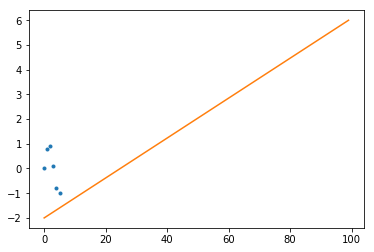

In [21]:
# BID! Part 14 UT Part 2
_ = plt.plot(x, y, '.',  xp) # now what if we an additional input?
xp # seems strange, but it's just plotting xp

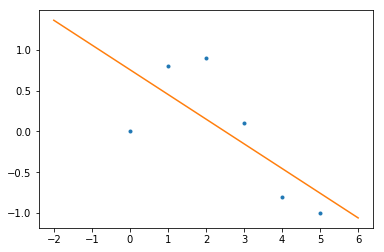

In [22]:
_ = plt.plot(x, y, '.', xp, p(xp), '-') # let's insert more and we see that it's just (x1, y1, linestyle1, x2, y2, linestyle2)
# remember p() something applies the polynomial coefficients to an array!

/home/solactus/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: RankWarning: Polyfit may be poorly conditioned


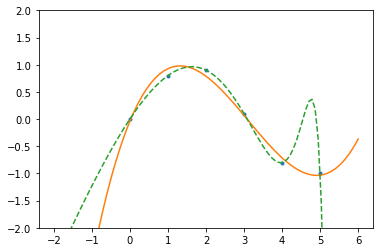

In [23]:
# now all at once since we understand it all... but we're not done yet.
import matplotlib.pyplot as plt
import numpy as np

x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 3)
p = np.poly1d(z)
p30 = np.poly1d(np.polyfit(x, y, 30))
xp = np.linspace(-2, 6, 100)
_ = plt.plot(x, y, '.', xp, p(xp), '-', xp, p30(xp), '--')
_ = plt.ylim(-2, 2)

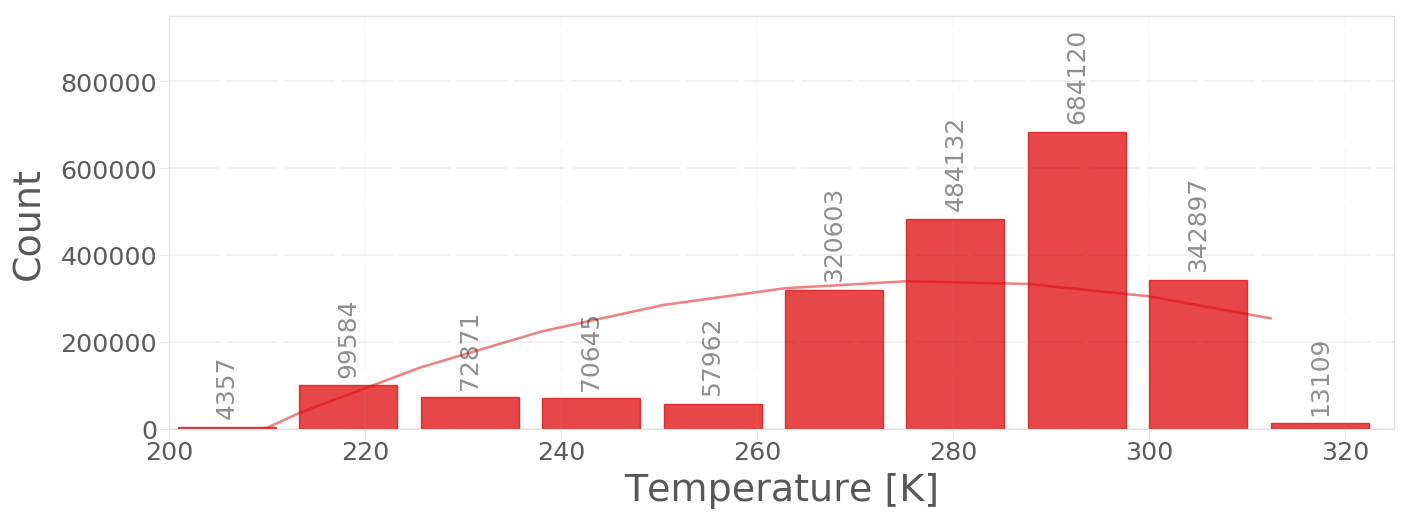

In [24]:
# now apply it to our original data!
coeff = np.polyfit(bins[:-1], hist, 2) # remember, 2 indicates ax^2 + bx + c
bestfit_gen = np.poly1d(coeff) # create a generator
bestfit_y = bestfit_gen(bins[:-1]) # and apply it to our x, which is bins here

vis.plot_bar(bins[:-1], hist, xlim=(200, 325), ylim=(0, 950000), xlabel='Temperature [K]', ylabel='Count') # plot the bars
vis.plot_line(bins[:-1], bestfit_y, xlim=(200, 325), ylim=(0, 950000), # plot a best fit line
              xlabel='Temperature [K]', ylabel='Count', figsize='na') # looks pretty good

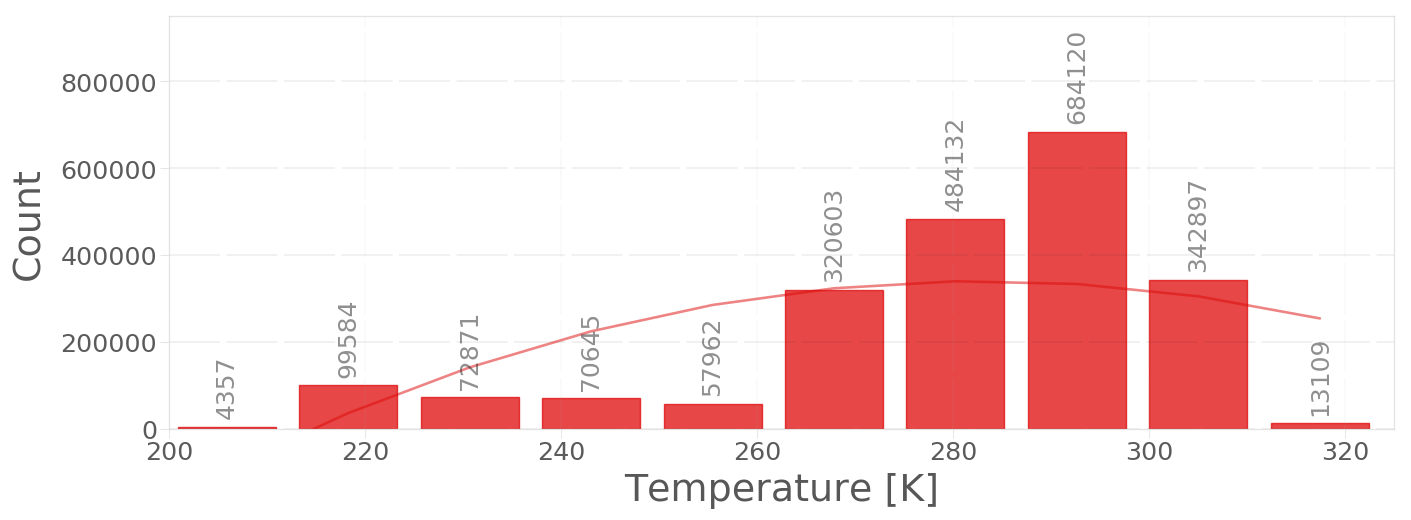

In [25]:
# but best fit line looks shifted to left, easily change that by...
vis.plot_bar(bins[:-1], hist, xlim=(200, 325), ylim=(0, 950000), xlabel='Temperature [K]', ylabel='Count')
vis.plot_line(bins[:-1] + 5, bestfit_y, xlim=(200, 325), ylim=(0, 950000), # adding 5 to bins to center
              xlabel='Temperature [K]', ylabel='Count', figsize='na')